In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
x = data.iloc[:,1:3]

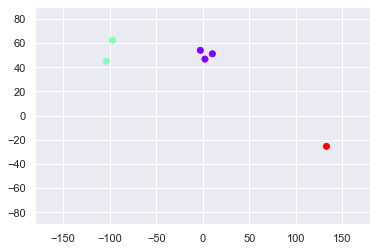

In [10]:
kmeans = KMeans(3)  # try 3 clusters 
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

plt.scatter(data['Longitude'],data['Latitude'], c= data_with_clusters['Cluster'],cmap='rainbow') #color by cluster so we can see them 
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# selecting number of clusters

#### WCSS ( Within Cluster Sum of Squares )

In [12]:
kmeans.inertia_  #this is the wcss for the curent KMeans

288.10523333333333

to find the elbow (best number of clusters to use), we need to solvce the problems with 1,2,3,4,5,6,... clusters and calculate wcss


we can do this with a loop

In [13]:
wcss= []
for i in range (1,7):  # we have a  total of 6 observations. so 1 - 7
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

as we can see, the sequance is decsreasing with very big leaps in the first few steps and then much smaller steps later 

finally, when each point is a seperate cluster, we have a wcss of 0

#### the elbow method

Text(0, 0.5, 'within cluster sum of squares')

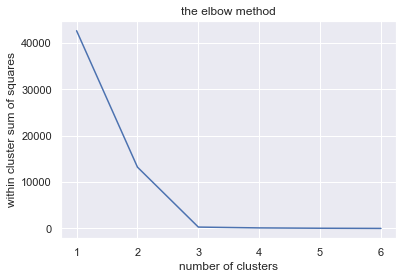

In [17]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of squares')

we can see that the optimal number of clusters is 3. as increasing the number of clusters from that point onwards there isnt much to gain. 